In [1]:
from bokeh.io import output_file,show,output_notebook,push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,HoverTool,BoxSelectTool
from bokeh.layouts import row,column,gridplot
from bokeh.models.widgets import Tabs,Panel
output_notebook()
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data = pd.read_csv("/content/Car_sale_ads.csv",engine="python", error_bad_lines=False)
pd.set_option('display.max_columns',None)
df = pd.DataFrame(data)
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 1416: ',' expected after '"'


,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,CO2_emissions,Drive,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,145.0,1400.0,Gasoline,NaN,Front wheels,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,75.0,1100.0,Gasoline,NaN,Front wheels,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,180.0,1368.0,Gasoline,NaN,NaN,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,160.0,1368.0,Gasoline,139.0,Front wheels,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,165.0,1368.0,Gasoline,NaN,NaN,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193097,208299,39900,PLN,Used,Żuk,Other,NaN,NaN,2014,40000.0,173.0,1301.0,Gasoline,NaN,NaN,Manual,small_cars,1.0,other,NaN,NaN,NaN,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
193098,208300,10900,PLN,Used,Żuk,Other,NaN,NaN,1970,63518.0,70.0,2120.0,Gasoline,NaN,Rear wheels,Manual,station_wagon,4.0,other,Poland,NaN,NaN,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
193099,208301,6900,PLN,Used,Żuk,Other,NaN,NaN,1977,11880.0,60.0,2120.0,Gasoline,NaN,NaN,Manual,SUV,3.0,red,NaN,NaN,11/06/1977,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
193100,208302,5700,PLN,Used,Żuk,Other,NaN,NaN,1986,100000.0,36.0,2200.0,Gasoline,NaN,NaN,Manual,minivan,2.0,blue,NaN,NaN,NaN,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


# **I will be discussing and engineering data of 2 different research questions**


1.   ***Throughout the years, has a car's engine power and car's engine size (in cubic cintemeters) increased?***


*First, renaming features to be more descriptive*

In [3]:
data.rename(columns = {'Power_HP':'Engine_power_in_horsepower'}, inplace = True)
data.rename(columns = {'Displacement_cm3':'Engine_size_in_cc'}, inplace = True)

*I will discard all features except the ones mentioned in my research question*

In [4]:
data = data[['Production_year', 'Engine_power_in_horsepower','Engine_size_in_cc']]
data

,Production_year,Engine_power_in_horsepower,Engine_size_in_cc
0,2021,145.0,1400.0
1,1974,75.0,1100.0
2,2018,180.0,1368.0
3,2012,160.0,1368.0
4,2021,165.0,1368.0
...,...,...,...
193097,2014,173.0,1301.0
193098,1970,70.0,2120.0
193099,1977,60.0,2120.0
193100,1986,36.0,2200.0


*sort data by year of production ascendingly*

In [5]:
data = data.sort_values(by=['Production_year'])

*check for missing values in production year*

In [6]:
bool_series = pd.isnull(data["Production_year"])
data[bool_series]

,Production_year,Engine_power_in_horsepower,Engine_size_in_cc


*check for missing values in engine's power (HP)*

In [7]:
bool_series = pd.isnull(data["Engine_power_in_horsepower"])
data[bool_series]

,Production_year,Engine_power_in_horsepower,Engine_size_in_cc
138703,1936,NaN,3499.0
138774,1936,NaN,1500.0
117727,1936,NaN,1500.0
20145,1947,NaN,5200.0
92480,1951,NaN,NaN
...,...,...,...
168966,2021,NaN,1984.0
168963,2021,NaN,1984.0
168970,2021,NaN,1984.0
168897,2021,NaN,1984.0


*replace missing values with average of column*

In [8]:
data['Engine_power_in_horsepower'].fillna(value=df['Engine_power_in_horsepower'].mean(), inplace=True)

*check for missing values in engine's size*

In [9]:
bool_series = pd.isnull(data["Engine_size_in_cc"])
data[bool_series]

,Production_year,Engine_power_in_horsepower,Engine_size_in_cc
92480,1951,146.49581,NaN
117765,1951,146.49581,NaN
67004,1954,146.49581,NaN
53214,1955,146.49581,NaN
117477,1965,146.49581,NaN
...,...,...,...
145982,2021,204.00000,NaN
144301,2021,204.00000,NaN
144229,2021,204.00000,NaN
144885,2021,204.00000,NaN


*replace missing values with average of column*

In [10]:
data['Engine_size_in_cc'].fillna(value=df['Engine_size_in_cc'].mean(), inplace=True)

***Some visualisation models:***

*Scatter plot*

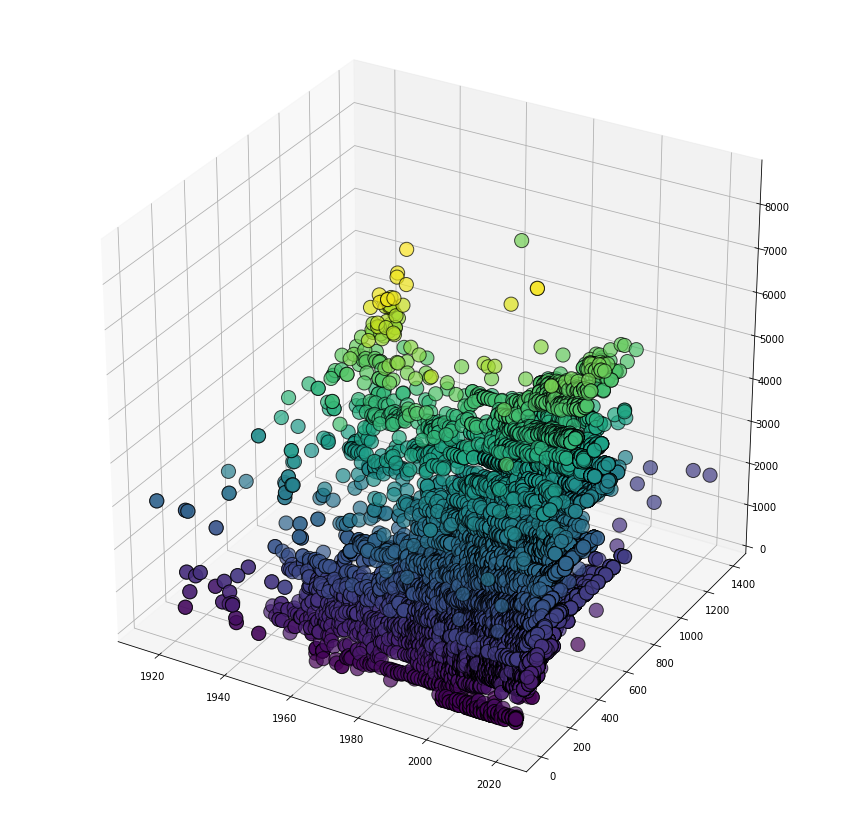

In [16]:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Production_year'], data['Engine_power_in_horsepower'], data['Engine_size_in_cc'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=data['Engine_size_in_cc'])
plt.show()
ax.set_xlabel('Prodution year')
ax.set_ylabel('Engine power / horsepower')
ax.set_zlabel('Engine size / cc')

plt.show()

*Heatmap*

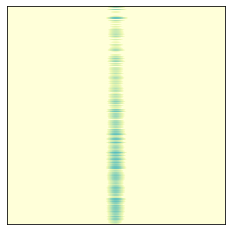

In [12]:
# Create figure and add axis
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
# Remove x and y ticks
ax.xaxis.set_tick_params(size=0)
ax.yaxis.set_tick_params(size=0)
ax.set_xticks([])
ax.set_yticks([])
# Show AFM image
img = ax.imshow(data, origin='lower', cmap='YlGnBu_r', extent=(0, 2, 0, 2), vmin=0, vmax=200)

*Now we will try to find the statistical relationship between two variables which is referred to as their correlation.*

Positive Correlation: variables change in the same direction.

Neutral Correlation: No relationship in the change of the variables.

Negative Correlation: variables change in opposite directions.

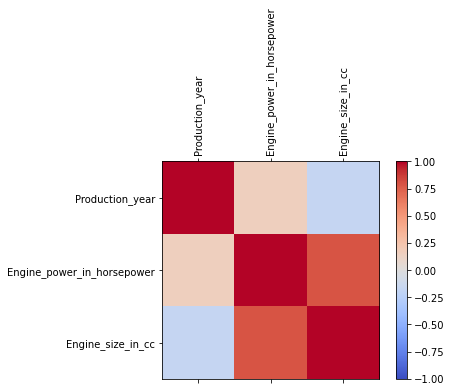

In [13]:
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

On this example, when there is **no correlation** between 2 variables (when correlation is 0 or near 0) the color is **beige**. The **darkest red** means there is a **perfect positive correlation**, while the **darkest blue** means there is a **perfect negative correlation**.

When evaluating the correlation between all the features, the “corr()” method includes the correlation of each feature with itself, which is always 1, so that is why this type of graph always has the red diagonal from the upper left to the lower right. Other than the diagonal, the rest of the squares show correlation between different features, making it easy to find that:

*   **Engine power and engine size have positive colleartion between each other**
*   **Engine power and production year have neutral colleration between eah other**
*   **Engine size and production year have negative colleration between eah other**



